In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
main_df = pd.read_csv('E:/Data Analytics/workshop/ABD vs Bumrah-20220218T052448Z-001/ABD vs Bumrah/IPL_ball_by_ball_updated.csv')

In [3]:
main_df.striker.unique()



array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'BB McCullum', 'Mohammad Hafeez', 'R Dravid', 'P Kumar', 'Z Khan',
       'SB Joshi', 'AA Noffke', 'B Akhil', 'SC Ganguly', 'RT Ponting',
       'DJ Hussey', 'M Kaif', 'M Rawat', 'RA Jadeja', 'DS Lehmann',
       'SK Warne', 'D Salunkhe', 'SM Katich', 'YK Pathan', 'T Kohli',
       'IK Pathan', 'SR Watson', 'S Dhawan', 'G Gambhir', 'V Sehwag',
       'SK Trivedi', 'KC Sangakkara', 'MEK Hussey', 'JDP Oram',
       'SK Raina', 'S Badrinath', 'ML Hayden', 'PA Patel', 'MS Dhoni',
       'Yuvraj Singh', 'JR Hopes', 'K Goel', 'AS Yadav', 'A Symonds',
       'SB Styris', 'SB Bangar', 'RP Singh', 'WPUJC Vaas', 'AC Gilchrist',
       'VVS Laxman', 'Y Venugopal Rao', 'WP Saha', 'RG Sharma',
       'LR Shukla', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'ST Jayasuriya', 'DJ Thornely', 'L Ronchi',
       'LRPL Taylor', 'S Chanderpaul', 'Kamran Akmal', 'PP Chawla',
       'DPMD Jayawardene'

In [4]:
def batsman_runs_by_each_year(main_df , batsman_name):
    main_df = main_df[(main_df.innings == 1) | (main_df.innings == 2)]
    df = main_df[main_df.striker == batsman_name]  #'MS Dhoni'
    df = df[(main_df.wides != 1.)]
    df = df[(main_df.wides != 2.)]
    df = df[(main_df.wides != 3.)]
    df = df[(main_df.wides != 5.)]
    df = df[(main_df.wides != 4.)]
    

    df_runs_by_year = pd.DataFrame(df.groupby('season')['runs_off_bat'].sum()).sort_values(by = ['season'] , ascending=True).reset_index()
    df_balls_by_year = pd.DataFrame(df.groupby('season')['ball'].count()).sort_values(by = ['season'] , ascending=True).reset_index()
    df_dismiss_by_year = pd.DataFrame(df.groupby('season')['player_dismissed'].count()).sort_values(by = ['season'] , ascending=True).reset_index().rename(columns={"player_dismissed":"Num_of_times_dismissed"})
    df_by_each_year = df_runs_by_year.merge(df_balls_by_year , on = 'season' , how = 'left')
    df_by_each_year['Strike_rate'] = 100* df_by_each_year.runs_off_bat/df_by_each_year.ball
    df_by_each_year['Average'] = df_by_each_year.runs_off_bat/  .Num_of_times_dismissed
    df_by_each_year = df_by_each_year.merge(df_dismiss_by_year , on = 'season' , how = 'left')
    
    return df_by_each_year

In [5]:
Dhoni_df_by_each_year = batsman_runs_by_each_year(main_df , 'MS Dhoni')
Dhoni_df_by_each_year

,season,runs_off_bat,ball,Strike_rate,Average,Num_of_times_dismissed
0,2008,414,310,133.548387,37.636364,11
1,2009,332,261,127.203065,41.500000,8
2,2010,287,210,136.666667,31.888889,9
3,2011,392,247,158.704453,35.636364,11
4,2012,358,278,128.776978,32.545455,11
5,2013,461,283,162.897527,38.416667,12
6,2014,371,250,148.400000,61.833333,6
7,2015,372,305,121.967213,23.250000,16
8,2016,284,210,135.238095,35.500000,8
9,2017,290,250,116.000000,22.307692,13


In [6]:
ABD_df_by_each_year = batsman_runs_by_each_year(main_df , 'F du Plessis')
ABD_df_by_each_year

,season,runs_off_bat,ball,Strike_rate,Average,Num_of_times_dismissed
0,2012,398,304,130.921053,36.181818,11
1,2014,303,235,128.936170,30.300000,10
2,2015,380,304,125.000000,34.545455,11
3,2016,206,162,127.160494,34.333333,6
4,2017,8,7,114.285714,8.000000,1
5,2018,162,129,125.581395,27.000000,6
6,2019,396,321,123.364486,36.000000,11
7,2020,449,319,140.752351,40.818182,11
8,2021,633,458,138.209607,45.214286,14


In [7]:
def plot_graph (df_by_each_year):
    plt.figure(figsize = (20,15),dpi=300)
    # plt.legend(['label1', 'label2'])
    plt.plot(df_by_each_year.season,df_by_each_year.runs_off_bat, color='red', marker='o')
    plt.plot(df_by_each_year.season,df_by_each_year.Strike_rate, color='green', marker='o')
    plt.legend(["y=runs_off_bat", "y=Strike_rate" ], loc =2 , fontsize = 20)
    plt.axhline(250, ls = '-', color = 'blue')
    plt.axhline(125, ls = '-', color = 'black')
    plt.xlabel('Season',fontsize = 30)
    plt.ylabel('Runs scored / Strike_rate', fontsize = 30)
    plt.title('Runs scored in each season 2008 - 2021', fontsize = 30)
    plt.grid(True)
    plt.show()


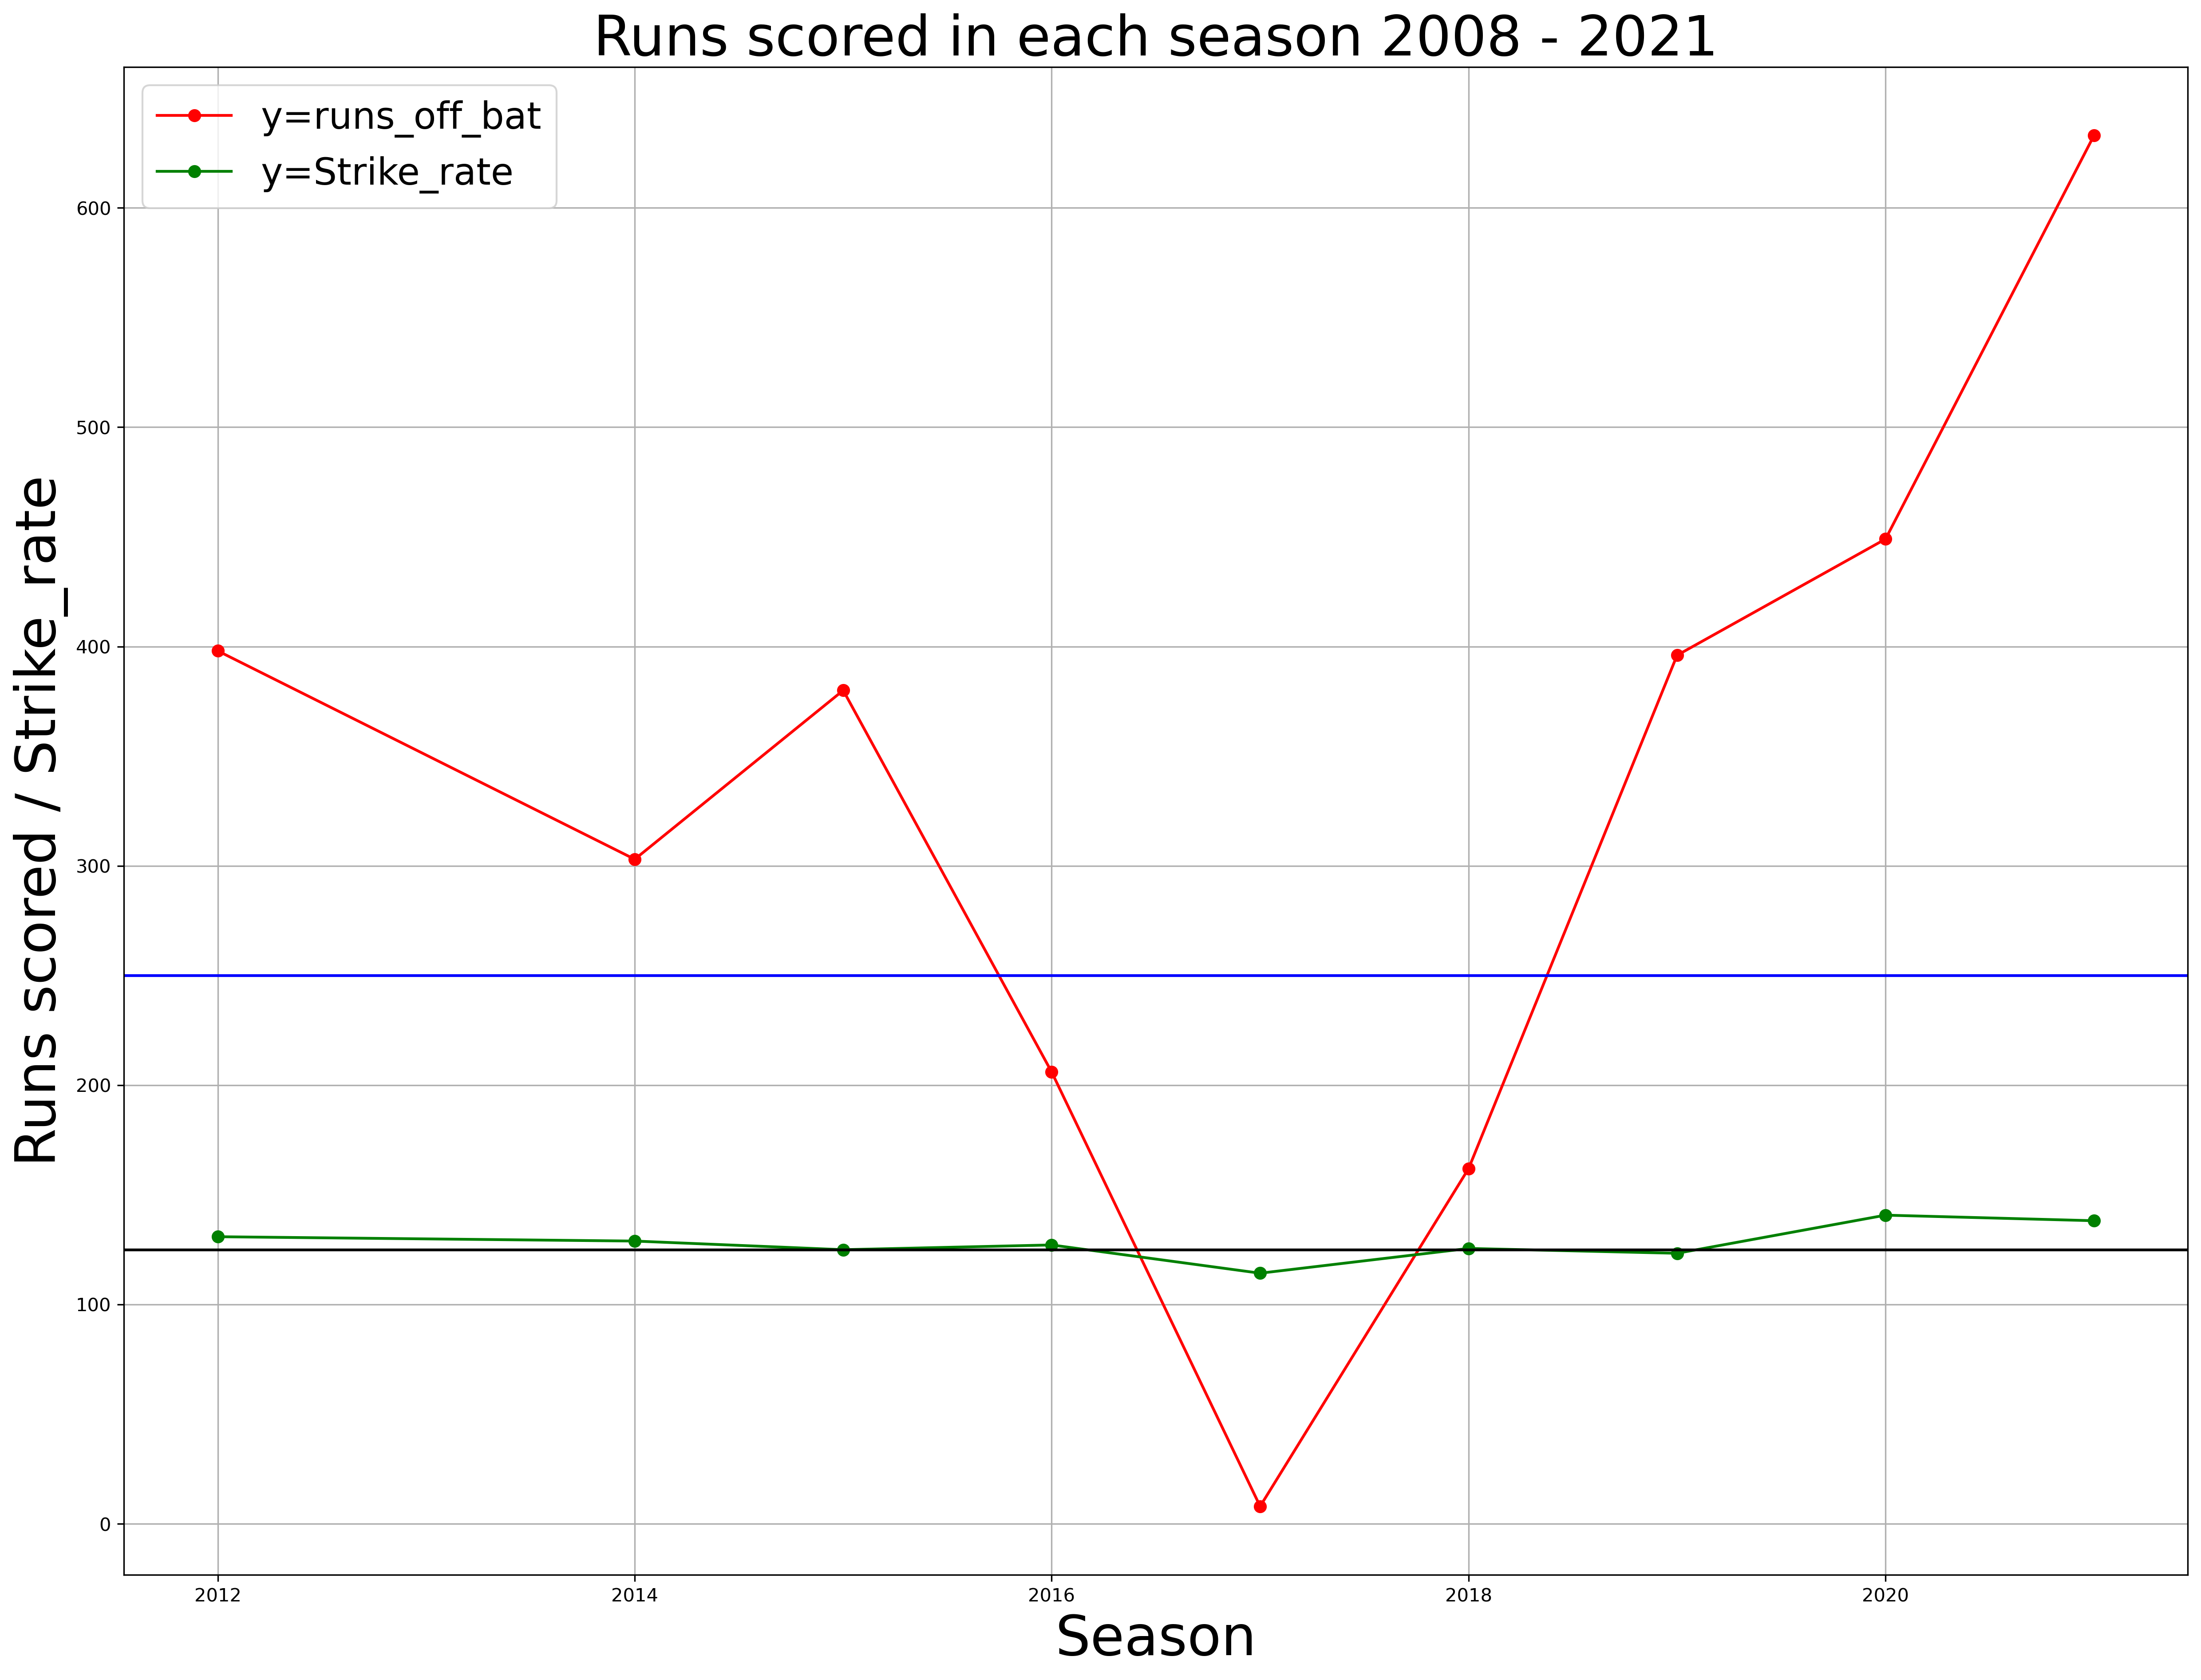

In [8]:
plot_graph(ABD_df_by_each_year)

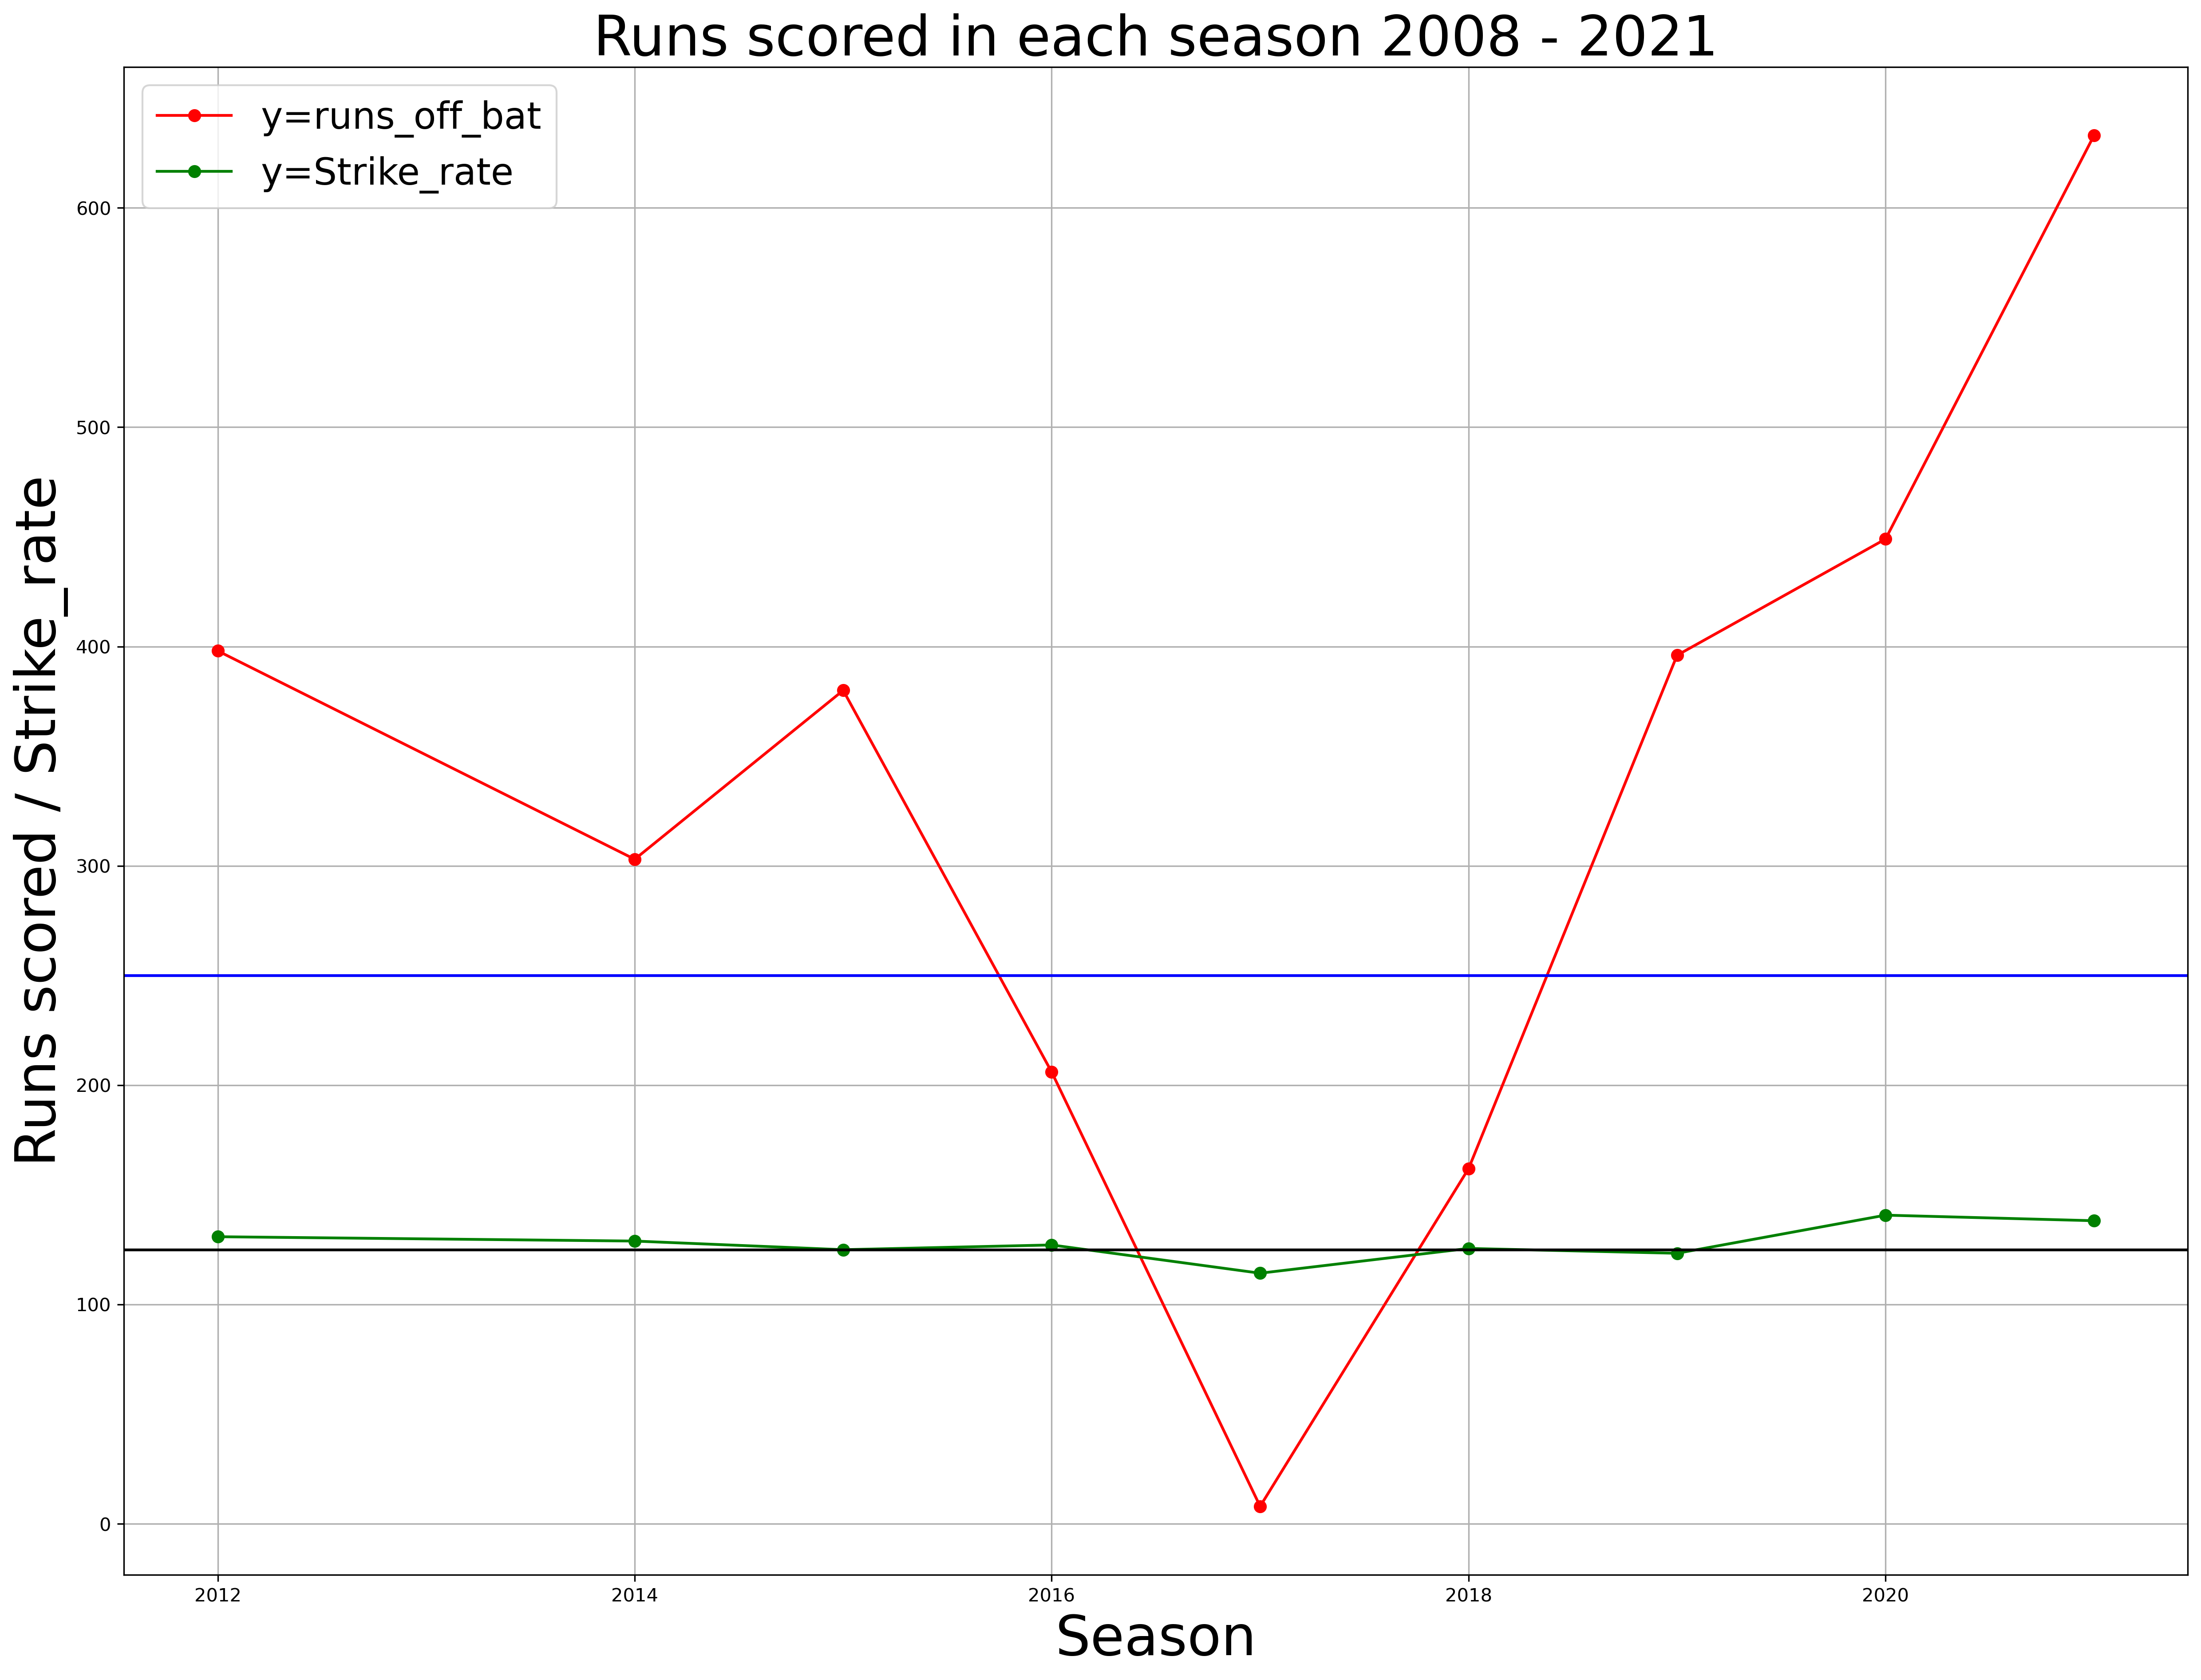

In [9]:
plot_graph(ABD_df_by_each_year)

In [ ]:
main_df.head()